# 第10章: ベクトル空間法 (II)
第10章では，前章に引き続き単語ベクトルの学習に取り組む．

## 90. word2vecによる学習
81で作成したコーパスに対して[word2vec](https://code.google.com/p/word2vec/)を適用し，単語ベクトルを学習せよ．さらに，学習した単語ベクトルの形式を変換し，86-89のプログラムを動かせ．

In [1]:
! DOWNLOAD_URL="https://drive.google.com`curl -c /tmp/cookies.txt \
        'https://drive.google.com/uc?export=download&id=0B7XkCwpI5KDYNlNUTTlSS21pQmM' \
        | sed -r 's/\"/\n/g' | grep id=0B7XkCwpI5KDYNlNUTTlSS21pQmM | grep confirm | sed 's/&amp;/\&/g'`" \
    && curl -L -b /tmp/cookies.txt -o google_news_vectors_negative300.bin.gz "$DOWNLOAD_URL" \
    && gzip -d google_news_vectors_negative300.bin.gz \
    && rm -f google_news_vectors_negative300.bin.gz \
    && rm -f /tmp/cookies.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3268    0  3268    0     0   3288      0 --:--:-- --:--:-- --:--:--  3287
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   383    0   383    0     0    492      0 --:--:-- --:--:-- --:--:--   492
100 1570M    0 1570M    0     0  11.0M      0 --:--:--  0:02:22 --:--:-- 11.9M    0  10.2M      0 --:--:--  0:01:01 --:--:-- 12.0M      0 --:--:--  0:01:27 --:--:-- 12.2M


In [2]:
import gensim.models.keyedvectors as word2vec

In [3]:
# https://stackoverflow.com/questions/49676060/unpicklingerror-invalid-load-key-3
model = word2vec.KeyedVectors.load_word2vec_format("google_news_vectors_negative300.bin", binary=True)

/usr/local/lib/python3.7/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [4]:
model["United_States"]

array([-3.61328125e-02, -4.83398438e-02,  2.35351562e-01,  1.74804688e-01,
       -1.46484375e-01, -7.42187500e-02, -1.01562500e-01, -7.71484375e-02,
        1.09375000e-01, -5.71289062e-02, -1.48437500e-01, -6.00585938e-02,
        1.74804688e-01, -7.71484375e-02,  2.58789062e-02, -7.66601562e-02,
       -3.80859375e-02,  1.35742188e-01,  3.75976562e-02, -4.19921875e-02,
       -3.56445312e-02,  5.34667969e-02,  3.68118286e-04, -1.66992188e-01,
       -1.17187500e-01,  1.41601562e-01, -1.69921875e-01, -6.49414062e-02,
       -1.66992188e-01,  1.00585938e-01,  1.15722656e-01, -2.18750000e-01,
       -9.86328125e-02, -2.56347656e-02,  1.23046875e-01, -3.54003906e-02,
       -1.58203125e-01, -1.60156250e-01,  2.94189453e-02,  8.15429688e-02,
        6.88476562e-02,  1.87500000e-01,  6.49414062e-02,  1.15234375e-01,
       -2.27050781e-02,  3.32031250e-01, -3.27148438e-02,  1.77734375e-01,
       -2.08007812e-01,  4.54101562e-02, -1.23901367e-02,  1.19628906e-01,
        7.44628906e-03, -

In [5]:
from scipy.spatial.distance import cosine

In [6]:
def cosine_sim(v1, v2):
    return max(1- cosine(v1, v2), 0)

In [7]:
cosine_sim(model["United_States"], model["U.S"])

0.3638412058353424

In [8]:
def similary_n_words(target_word, n=10):
    return model.most_similar(positive=[target_word], topn=n)

In [9]:
similary_n_words("England")

[('stock_symbol_BNK', 0.7334469556808472),
 ('ticker_symbol_BNK', 0.7256011962890625),
 ('Engand', 0.6351369619369507),
 ('Wales', 0.6337509155273438),
 ('Engalnd', 0.6287516355514526),
 ('FOOTBALL_::', 0.6109525561332703),
 ('Graner_contradicted', 0.6092768907546997),
 ('Englad', 0.5995262861251831),
 ('LSO_St_Lukes', 0.593121349811554),
 ('Lakenheath_Airfield', 0.586760938167572)]

In [10]:
vector = model["Spain"] - model["Madrid"] + model["Athens"]

In [11]:
def similary_n_words_by_word2vec_vector(target_vector, n=10):
    return model.most_similar([target_vector], [], n)

In [12]:
similary_n_words_by_word2vec_vector(vector)

[('Athens', 0.7528455853462219),
 ('Greece', 0.6685472130775452),
 ('Aristeidis_Grigoriadis', 0.5495778322219849),
 ('Ioannis_Drymonakos', 0.5361457467079163),
 ('Greeks', 0.5351786613464355),
 ('Ioannis_Christou', 0.5330225825309753),
 ('Hrysopiyi_Devetzi', 0.5088489651679993),
 ('Iraklion', 0.5059264898300171),
 ('Greek', 0.5040615797042847),
 ('Athens_Greece', 0.5034109354019165)]

## 91. アナロジーデータの準備
[単語アナロジーの評価データ](https://word2vec.googlecode.com/svn/trunk/questions-words.txt)をダウンロードせよ．このデータ中で": "で始まる行はセクション名を表す．例えば，": capital-common-countries"という行は，"capital-common-countries"というセクションの開始を表している．ダウンロードした評価データの中で，"family"というセクションに含まれる評価事例を抜き出してファイルに保存せよ．

In [13]:
# https://github.com/RaRe-Technologies/gensim/issues/760
! curl -o source-archive.zip https://storage.googleapis.com/google-code-archive-source/v2/code.google.com/word2vec/source-archive.zip \
    && unzip source-archive.zip \
    && mv word2vec/trunk/questions-words.txt ./ \
    && rm -rf word2vec \
    && rm -f source-archive.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  218k  100  218k    0     0   216k      0  0:00:01  0:00:01 --:--:--  216k
Archive:  source-archive.zip
   creating: word2vec/
   creating: word2vec/.svn/
  inflating: word2vec/.svn/all-wcprops  
   creating: word2vec/.svn/tmp/
   creating: word2vec/.svn/tmp/prop-base/
   creating: word2vec/.svn/tmp/props/
   creating: word2vec/.svn/tmp/text-base/
   creating: word2vec/.svn/prop-base/
   creating: word2vec/.svn/props/
   creating: word2vec/.svn/text-base/
  inflating: word2vec/.svn/entries   
   creating: word2vec/trunk/
  inflating: word2vec/trunk/demo-phrases.sh  
  inflating: word2vec/trunk/demo-word.sh  
  inflating: word2vec/trunk/questions-phrases.txt  
  inflating: word2vec/trunk/demo-word-accuracy.sh  
  inflating: word2vec/trunk/README.txt  
  inflating: word2vec/trunk/makefile  
  inflating: word2vec/trunk/word2phras

In [14]:
with open("questions-words.txt", mode="r") as f:
    lines = f.readlines()

In [15]:
family_lines = []

for line in lines:
    if line.startswith(": "):
        section_name = line.strip().replace(": ", "")
    elif section_name == "family":
        family_lines.append(line.strip())

In [16]:
family_lines[:5]

['boy girl brother sister',
 'boy girl brothers sisters',
 'boy girl dad mom',
 'boy girl father mother',
 'boy girl grandfather grandmother']

In [17]:
with open("questions-words-family.txt", mode="w") as f:
    f.write("\n".join(family_lines))

## 92. アナロジーデータへの適用
91で作成した評価データの各事例に対して，vec(2列目の単語) - vec(1列目の単語) + vec(3列目の単語)を計算し，そのベクトルと類似度が最も高い単語と，その類似度を求めよ．求めた単語と類似度は，各事例の末尾に追記せよ．このプログラムを85で作成した単語ベクトル，90で作成した単語ベクトルに対して適用せよ．

In [18]:
with open("questions-words-family.txt", mode="r") as f:
    family_lines = f.readlines()

In [19]:
import joblib

In [20]:
vectors = joblib.load("../ch9/vectors.pcl")
ordered_t_index = joblib.load("../ch9/ordered_t_index.pcl")

In [21]:
def similary_n_words_by_ch9_vector(target_vector, n=10):
    sorted_results = sorted([(t, cosine_sim(target_vector, vectors[ordered_t_index[t]])) for t in ordered_t_index.keys()], key=lambda x: x[1], reverse=True)
    return sorted_results[:n]

In [22]:
from joblib import Parallel, delayed

In [23]:
def _get_most_sim_word(line):
    words = line.strip().split()
    
    if not all(map(lambda x:x in ordered_t_index, words[:3])):
        return line, "none", 0.0
    
    vector = vectors[ordered_t_index[words[1]]] - vectors[ordered_t_index[words[0]]] + vectors[ordered_t_index[words[2]]]
    most_sim_word, dist = similary_n_words_by_ch9_vector(vector, n=1)[0]

    return (line, most_sim_word, dist)

In [24]:
results = Parallel(n_jobs=-1, backend="threading", verbose=3)([
    delayed(_get_most_sim_word)
    (line)
    for line in family_lines
])

s = "\n".join(["%s %s %f" % (line.strip(), most_sim_word, dist) for line, most_sim_word, dist in results])

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
/usr/local/lib/python3.7/site-packages/scipy/spatial/distance.py:720: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed: 52.1min
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed: 94.0min
[Parallel(n_jobs=-1)]: Done 506 out of 506 | elapsed: 166.4min finished


In [25]:
with open("questions-words-family-with-ch9-predict.txt", mode="w") as f:
        f.write(s)

In [26]:
results = []

for line in family_lines:
    words = line.strip().split()
    vector = model[words[1]] - model[words[0]] + model[words[2]]
    most_sim_word, dist = similary_n_words_by_word2vec_vector(vector, n=1)[0]
    results.append((line.strip(), most_sim_word, dist))

s = "\n".join(["%s %s %f" % (line.strip(), most_sim_word, dist) for line, most_sim_word, dist in results])

In [27]:
with open("questions-words-family-with-word2vec-predict.txt", mode="w") as f:
        f.write(s)

## 93. アナロジータスクの正解率の計算
92で作ったデータを用い，各モデルのアナロジータスクの正解率を求めよ．

In [28]:
def evaluate_precision(lines):
    acc = 0.0

    for line in lines:
        words = line.split()
        if words[3] == words[4]:
            acc += 1

    acc /= len(lines)
    return acc

In [29]:
with open("questions-words-family-with-ch9-predict.txt", mode="r") as f:
    family_lines = f.readlines()

evaluate_precision(family_lines)

0.003952569169960474

In [30]:
with open("questions-words-family-with-word2vec-predict.txt", mode="r") as f:
    family_lines = f.readlines()

evaluate_precision(family_lines)

0.34980237154150196

## 94. WordSimilarity-353での類似度計算
[The WordSimilarity-353 Test Collection](http://www.cs.technion.ac.il/~gabr/resources/data/wordsim353/)の評価データを入力とし，1列目と2列目の単語の類似度を計算し，各行の末尾に類似度の値を追加するプログラムを作成せよ．このプログラムを85で作成した単語ベクトル，90で作成した単語ベクトルに対して適用せよ．

In [31]:
! curl -o wordsim353.zip http://www.cs.technion.ac.il/~gabr/resources/data/wordsim353/wordsim353.zip \
    && unzip wordsim353.zip -d wordsim353 \
    && mv wordsim353/combined.csv ./ \
    && rm -rf wordsim353 \
    && rm -f wordsim353.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 23257  100 23257    0     0   4590      0  0:00:05  0:00:05 --:--:--  4839
Archive:  wordsim353.zip
  inflating: wordsim353/combined.csv  
  inflating: wordsim353/set1.csv     
  inflating: wordsim353/set2.csv     
  inflating: wordsim353/combined.tab  
  inflating: wordsim353/set1.tab     
  inflating: wordsim353/set2.tab     
  inflating: wordsim353/instructions.txt  


In [32]:
with open("combined.csv", mode="r") as f:
    lines = f.readlines()

In [33]:
from scipy.spatial.distance import cosine

In [34]:
def cosine_sim(v1, v2):
    return max(1- cosine(v1, v2), 0)

In [35]:
def _cosine_sim_between_words(line):
    words = line.strip().split(",")
    
    if not all(map(lambda x:x in ordered_t_index, words[:2])):
        return (line, 0.0)
    
    vector1 = vectors[ordered_t_index[words[0]]]
    vector2 = vectors[ordered_t_index[words[1]]]
    dist = cosine_sim(vector1, vector2)
    
    if dist != dist:
        dist = 0.0
    
    return (line, dist)

In [36]:
results = Parallel(n_jobs=-1, backend="threading", verbose=3)([
    delayed(_cosine_sim_between_words)
    (line)
    for line in lines
])

s = "\n".join(["%s,%f" % (line.strip(), dist) for line, dist in results])

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 354 out of 354 | elapsed:    0.1s finished


In [37]:
with open("combined-ch9-predict.csv", mode="w") as f:
        f.write(s)

In [38]:
results = []

for line in lines:
    words = line.strip().split(",")
    
    if not all(map(lambda x:x in model, words[:2])):
        results.append((line.strip(), 0.0))
        continue
    
    vector1 = model[words[0]]
    vector2 = model[words[1]]
    dist = cosine_sim(vector1, vector2)
    results.append((line.strip(), dist))

s = "\n".join(["%s,%f" % (line.strip(), dist) for line, dist in results])

In [39]:
with open("combined-word2vec-predict.csv", mode="w") as f:
        f.write(s)

## 95. WordSimilarity-353での評価
94で作ったデータを用い，各モデルが出力する類似度のランキングと，人間の類似度判定のランキングの間のスピアマン相関係数を計算せよ．

In [40]:
from scipy.stats import spearmanr

In [41]:
def evaluate_spearman(correct, predict):
    correlation, pvalue = spearmanr(correct, predict)
    return correlation

In [42]:
with open("combined-ch9-predict.csv", mode="r") as f:
    lines = f.readlines()

In [43]:
correct = []
predict = []

for line in lines[1:]:
    words = line.strip().split(",")
    correct.append(float(words[2]))
    predict.append(float(words[3]))
    
evaluate_spearman(correct, predict)

0.21162000283408422

In [44]:
with open("combined-word2vec-predict.csv", mode="r") as f:
    lines = f.readlines()

In [45]:
correct = []
predict = []

for line in lines[1:]:
    words = line.strip().split(",")
    correct.append(float(words[2]))
    predict.append(float(words[3]))
    
evaluate_spearman(correct, predict)

0.7000336108937079

## 96. 国名に関するベクトルの抽出
word2vecの学習結果から，国名に関するベクトルのみを抜き出せ．

In [46]:
import pandas as pd

In [47]:
df = pd.read_csv("english_country_name.csv")

In [48]:
country_names = set([" ".join([part.strip().strip(".,!?;:()[]'\"") for part in country_name.split(" ")]) for country_name in df["英語名"].to_list()])

country_names |= set(["".join([c.strip().strip(".,!?;:()[]'\"") for c in country_name]) for country_name in df["三字"].to_list()])
country_names |= set(["".join([c.strip().strip(".,!?;:()[]'\"") for c in country_name]) for country_name in df["二字"].to_list() if country_name == country_name ])

country_names |= set([".".join([c.strip().strip(".,!?;:()[]'\"") for c in country_name]) for country_name in df["三字"].to_list()])
country_names |= set([".".join([c.strip().strip(".,!?;:()[]'\"") for c in country_name]) for country_name in df["二字"].to_list() if country_name == country_name ])

country_names

{'C.H',
 'MUS',
 'Nepal',
 'KGZ',
 'N.R',
 'Christmas Island',
 'A.U.S',
 'Marshall Islands',
 'Timor-Leste',
 'SLV',
 'PW',
 'FO',
 'MNG',
 'B.L',
 'L.U',
 'V.E',
 'W.L.F',
 'P.S.E',
 'CA',
 'TR',
 'TUV',
 'B.G.D',
 'M.Y.S',
 'MYT',
 'DJ',
 'P.F',
 'PT',
 'GBR',
 'TO',
 'D.E',
 'A.W',
 'Bonaire Saint Eustatius and Saba',
 'Congo',
 'BQ',
 'G.U.F',
 'N.P',
 'SVK',
 'Cambodia',
 'U.G',
 'FJI',
 'K.A.Z',
 'Sierra Leone',
 'VAT',
 'M.M',
 'CYP',
 'NIU',
 'MSR',
 'C.P.V',
 'Paraguay',
 'F.L.K',
 'Guernsey',
 'D.E.U',
 'M.L.T',
 'KI',
 'Kiribati',
 'India',
 'H.R',
 'WSM',
 'EST',
 'Guyana',
 'Martinique',
 'B.E.L',
 'H.M',
 'AE',
 'CZE',
 'Namibia',
 'C.O.D',
 'China',
 'G.Y',
 'GUY',
 'Singapore',
 'ERI',
 'CYM',
 'T.H',
 'J.O',
 'G.N',
 'I.T.A',
 'C.U.W',
 'I.E',
 'M.U',
 'PLW',
 'SH',
 'A.S',
 'MN',
 'A.L.A',
 'PCN',
 'CR',
 'A.T.G',
 'T.T',
 'P.K',
 'L.K.A',
 'Azerbaijan',
 'KIR',
 'Wallis and Futuna',
 'VE',
 'EC',
 'T.J',
 'M.N.E',
 'Brunei Darussalam',
 'AM',
 'Finland',
 'UG',
 'PH

In [49]:
country_vectors = {}
for country_name in country_names:
    if country_name not in model:
        continue
    country_vector = model[country_name]
    country_vectors[country_name] = country_vector

In [50]:
country_vectors.keys()

dict_keys(['MUS', 'Nepal', 'SLV', 'PW', 'FO', 'MNG', 'CA', 'TR', 'TUV', 'MYT', 'DJ', 'PT', 'GBR', 'TO', 'Congo', 'BQ', 'SVK', 'Cambodia', 'FJI', 'VAT', 'CYP', 'NIU', 'MSR', 'Paraguay', 'Guernsey', 'KI', 'Kiribati', 'India', 'WSM', 'EST', 'Guyana', 'Martinique', 'AE', 'CZE', 'Namibia', 'China', 'GUY', 'Singapore', 'ERI', 'CYM', 'PLW', 'SH', 'MN', 'PCN', 'CR', 'Azerbaijan', 'KIR', 'VE', 'EC', 'AM', 'Finland', 'UG', 'PH', 'KWT', 'DNK', 'Morocco', 'EG', 'France', 'Nigeria', 'SAU', 'HM', 'MR', 'BEN', 'LVA', 'GIB', 'BTN', 'MU', 'GE', 'SO', 'MV', 'Chad', 'QA', 'AF', 'Kuwait', 'Netherlands', 'Germany', 'COL', 'Liechtenstein', 'Somalia', 'SYC', 'BGD', 'FLK', 'PF', 'SV', 'Eritrea', 'AU', 'Curaçao', 'IE', 'SMR', 'TN', 'BB', 'OMN', 'YT', 'JAM', 'TCA', 'RE', 'SD', 'VIR', 'KR', 'AT', 'PR', 'GB', 'MDG', 'Luxembourg', 'ARE', 'Latvia', 'Niger', 'Angola', 'AG', 'MAF', 'VCT', 'GTM', 'BEL', 'PSE', 'SR', 'Tuvalu', 'ATA', 'Sweden', 'LTU', 'UKR', 'ALB', 'IQ', 'FIN', 'BL', 'Andorra', 'TKL', 'BHR', 'Qatar', 'B

## 97. k-meansクラスタリング
96の単語ベクトルに対して，k-meansクラスタリングをクラスタ数k=5として実行せよ．

In [51]:
from sklearn.cluster import KMeans

In [52]:
country_names = list(country_vectors.keys())

In [53]:
X = [country_vectors[country_name] for country_name in country_names]

In [54]:
kmeans = KMeans(n_clusters=5, random_state=0)

In [55]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [56]:
predict = kmeans.predict(X)
predict

array([1, 0, 4, 1, 1, 4, 4, 1, 4, 4, 1, 1, 2, 2, 0, 4, 2, 0, 4, 4, 4, 4,
       4, 3, 3, 1, 3, 0, 4, 4, 3, 3, 1, 2, 0, 0, 2, 3, 4, 4, 4, 1, 1, 4,
       1, 0, 4, 1, 4, 1, 3, 1, 1, 2, 4, 0, 1, 3, 0, 4, 1, 1, 2, 4, 4, 4,
       4, 4, 2, 1, 1, 4, 1, 0, 3, 3, 2, 3, 0, 4, 4, 4, 1, 1, 0, 4, 3, 4,
       4, 1, 1, 4, 1, 1, 4, 1, 1, 4, 1, 2, 4, 4, 4, 3, 2, 3, 0, 0, 1, 4,
       4, 4, 2, 4, 1, 3, 4, 3, 4, 2, 4, 4, 2, 1, 3, 4, 4, 0, 4, 1, 0, 0,
       4, 1, 1, 4, 3, 1, 4, 1, 4, 3, 3, 4, 4, 4, 0, 3, 1, 1, 1, 4, 0, 3,
       4, 4, 1, 4, 2, 4, 1, 1, 3, 1, 1, 1, 0, 1, 0, 4, 4, 3, 4, 4, 0, 0,
       4, 4, 0, 1, 4, 1, 1, 0, 4, 0, 4, 4, 4, 3, 0, 1, 1, 1, 2, 1, 0, 3,
       4, 3, 0, 4, 2, 3, 1, 4, 4, 2, 1, 4, 4, 1, 0, 4, 1, 3, 4, 4, 3, 0,
       4, 4, 4, 1, 4, 0, 4, 0, 4, 2, 4, 4, 1, 0, 4, 1, 1, 1, 1, 4, 1, 4,
       2, 2, 3, 1, 4, 4, 3, 3, 4, 1, 4, 1, 3, 4, 1, 4, 1, 1, 3, 4, 2, 1,
       3, 3, 4, 4, 0, 2, 0, 4, 4, 4, 3, 1, 4, 4, 2, 0, 1, 0, 1, 3, 4, 1,
       0, 3, 4, 3, 4, 4, 1, 1, 0, 1, 4, 1, 0, 4, 1,

## 98. Ward法によるクラスタリング
96の単語ベクトルに対して，Ward法による階層型クラスタリングを実行せよ．さらに，クラスタリング結果をデンドログラムとして可視化せよ．

In [57]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [58]:
result = linkage(X, method="ward")

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline

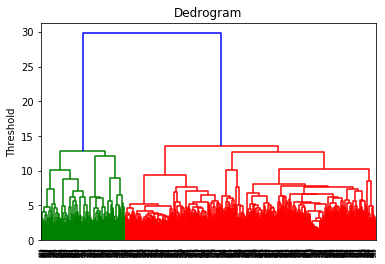

In [60]:
dendrogram(result)
plt.title("Dedrogram")
plt.ylabel("Threshold")
plt.show()

## 99. t-SNEによる可視化
96の単語ベクトルに対して，ベクトル空間をt-SNEで可視化せよ．

In [61]:
from sklearn.manifold import TSNE

In [62]:
tsne = TSNE(n_components=2, random_state=0)

In [63]:
X_embedded = tsne.fit_transform(X)

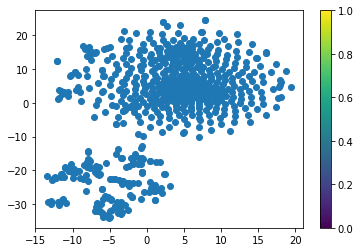

In [64]:
plt.scatter(X_embedded[:, 0], X_embedded[:, 1])
plt.colorbar()
plt.show()